<a href="https://colab.research.google.com/github/MijulSaxena/EDA-project-on-Gooogle-playstore./blob/main/Play_Store_App_Review_Analysis_Capstone_Project_by_Mijul_Saxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
# importing numpy, pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exctract the data of google playstore

In [3]:
play_store_data = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [4]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [7]:
# checking random data 
play_store_data.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1965,Quiz: Logo game,GAME,4.5,306764,29M,"10,000,000+",Free,0,Everyone,Trivia,"August 3, 2018",6.2,4.0.3 and up
2774,eBay: Buy & Sell this Summer - Discover Deals ...,SHOPPING,4.4,2788923,Varies with device,"100,000,000+",Free,0,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device
7975,CV Maker,PERSONALIZATION,3.2,114,3.0M,"10,000+",Free,0,Everyone,Personalization,"March 18, 2016",1.02,4.0.3 and up
81,PakWheels: Buy & Sell Cars,AUTO_AND_VEHICLES,4.4,15168,37M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 27, 2018",10.0.2,4.2 and up
6585,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
7965,CV Builder,BUSINESS,3.8,203,5.9M,"10,000+",Free,0,Everyone,Business,"September 30, 2016",2.2.1.0,2.3 and up
4078,Moto LED for Moto X & E [Root],LIFESTYLE,3.4,4082,318k,"500,000+",Free,0,Everyone,Lifestyle,"October 16, 2014",1.0,4.2 and up
1083,Google Pay,FINANCE,4.2,347838,Varies with device,"100,000,000+",Free,0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
248,Asana: organize team projects,BUSINESS,4.3,20815,10M,"1,000,000+",Free,0,Everyone,Business,"July 26, 2018",6.4.4,5.0 and up
29,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,"100,000+",Free,0,Everyone,Art & Design,"August 22, 2017",1.0,2.3 and up


##**Data Cleaning and preperation of dataset**

In [8]:
play_store_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Checking dulpicates in App column 

In [9]:
#checking duplicates in app column through value_counts(which returns the frequency)
play_store_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [10]:
#Removing the duplicate items
play_store_data.drop_duplicates(subset = 'App', inplace = True)

In [11]:
play_store_data.shape

(9660, 13)

##I observed that some columns are not that relevant also not responsible for app engagement and success like reviews, last updated date, current version, android version:

In [12]:
# we can drop all those irrelevent data
play_store_data.drop(['Last Updated', 'Reviews',	'Current Ver',	'Android Ver'], axis = 1, inplace = True)

In [13]:
play_store_data.shape

(9660, 9)

## I have successfully removed the irrelevant data. Now, dealing with null values.

In [14]:
# checking for null values in play store data
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1463
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [15]:
play_store_data[play_store_data['Content Rating'].isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [16]:
play_store_data[play_store_data['Type'].isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
9148,Command & Conquer: Rivals,FAMILY,NaN,Varies with device,0,NaN,0,Everyone 10+,Strategy


In [17]:
# Since there is only one missing value in Content Rating and Type column. According to my observation it is best to drop them :
play_store_data.dropna(subset = ['Content Rating', 'Type'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


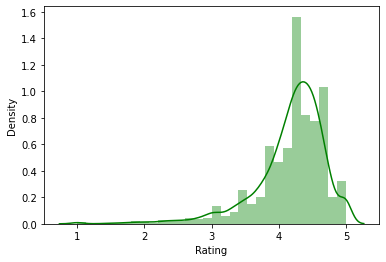

In [18]:
# checking for outliers
sns.distplot(play_store_data['Rating'],color='green',bins=30)

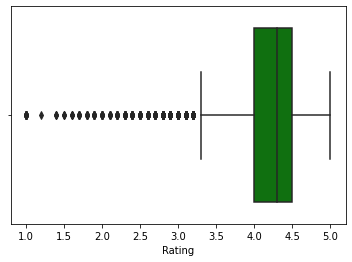

In [19]:
sns.boxplot(x='Rating', color = 'green', data = play_store_data)

In [20]:
# Rating column filling the null values with mode in rating column
mode_of_ratings = play_store_data['Rating'].mode()
play_store_data['Rating'].fillna(play_store_data['Rating'].mode()[0], inplace = True)

In [21]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

There is no null value left

In [22]:
play_store_data.shape

(9658, 9)

In [23]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Size            9658 non-null   object 
 4   Installs        9658 non-null   object 
 5   Type            9658 non-null   object 
 6   Price           9658 non-null   object 
 7   Content Rating  9658 non-null   object 
 8   Genres          9658 non-null   object 
dtypes: float64(1), object(8)
memory usage: 754.5+ KB


##**We can see from the above statement that columns like size, installs and price have object datatype instead of any numeric datatype. So, let's convert them into numeric datatype.**

In [24]:
play_store_data.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [25]:
# removing the ',' and '+' symbol from installs columns
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.strip('+'))
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.replace(',', ''))

In [26]:
play_store_data['Installs'] = play_store_data['Installs'].astype(int)

In [27]:
play_store_data.tail(10)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.3,9.8M,5000,Free,0,Everyone,Maps & Navigation
10832,FR Tides,WEATHER,3.8,582k,100000,Free,0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,619k,1000,Free,0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4.0,2.6M,500,Free,0,Everyone,Education
10835,FR Forms,BUSINESS,4.3,9.6M,10,Free,0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,53M,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.6M,100,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,9.5M,1000,Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,Varies with device,1000,Free,0,Mature 17+,Books & Reference
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,19M,10000000,Free,0,Everyone,Lifestyle


In [28]:
# converting KB to MB
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x))

In [29]:
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: x.strip('$'))
play_store_data['Price'] = play_store_data['Price'].astype(float)

In [30]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Size            8432 non-null   float64
 4   Installs        9658 non-null   int64  
 5   Type            9658 non-null   object 
 6   Price           9658 non-null   float64
 7   Content Rating  9658 non-null   object 
 8   Genres          9658 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 754.5+ KB


In [31]:
play_store_data.head(5)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


##**Exploratory Analysis and Visualization**

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
       'HOUSE_AND_HOME', 'EVENTS', 'ART_AND_DESIGN', 'PARENTING', 'COMICS',
       'BEAUTY'],
      dtype='object')


<BarContainer object of 33 artists>

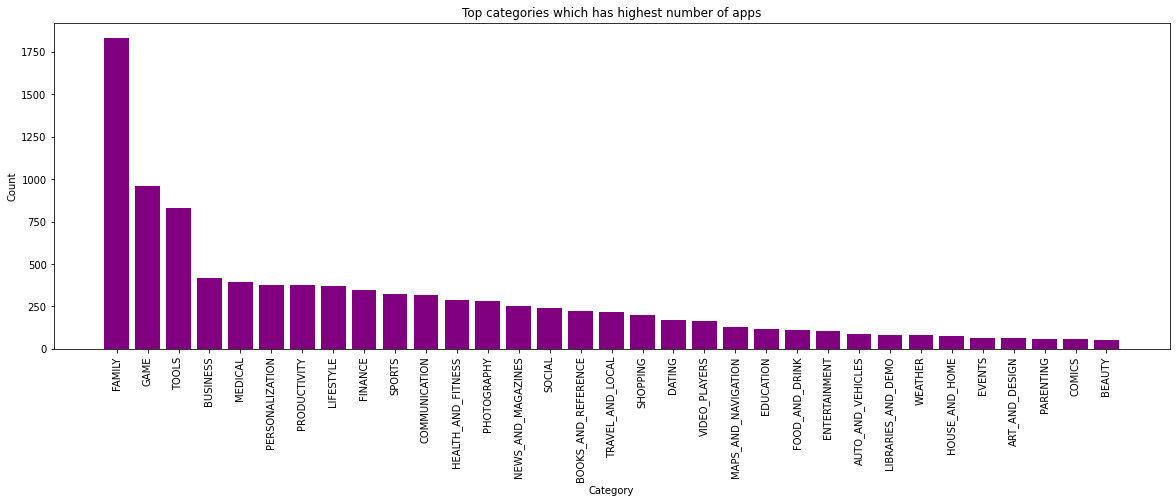

In [32]:
# Number of apps for each category
plt.figure(figsize=(20,6)) 
plt.xlabel("Category")
plt.ylabel("Count")
plt.title('Top categories which has highest number of apps')
plt.xticks(rotation=90)
y = play_store_data['Category'].value_counts()
x =  play_store_data['Category'].value_counts().index
print(x)
plt.bar(x,y, color = 'purple')

In [33]:
print(y)

FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


In [34]:
# total number of installs in each category
categories = play_store_data.groupby('Category')
category_total_installs = play_store_data.groupby('Category')[['Installs']].sum().reset_index()

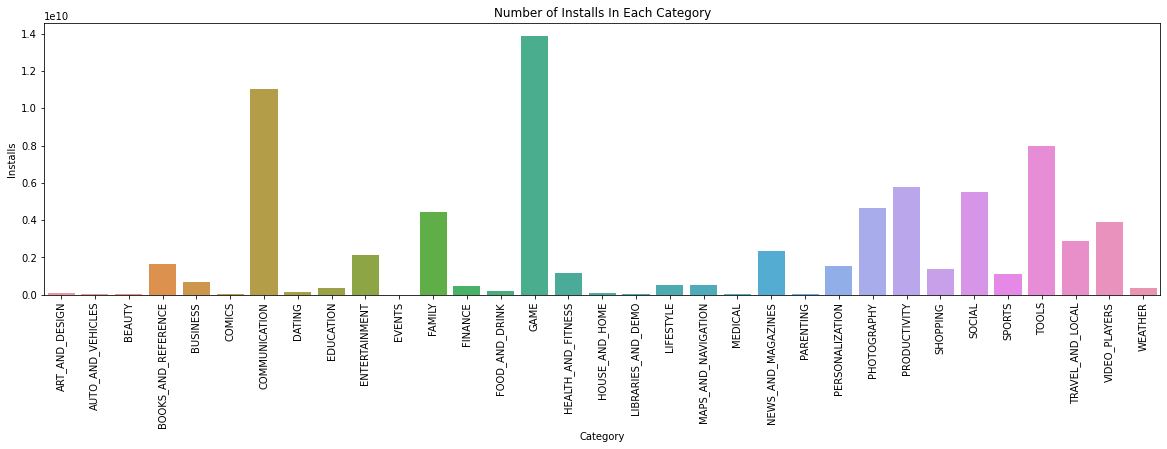

In [35]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Number of Installs In Each Category')
sns.barplot(x='Category', y='Installs', data = category_total_installs)

ValueError: ignored

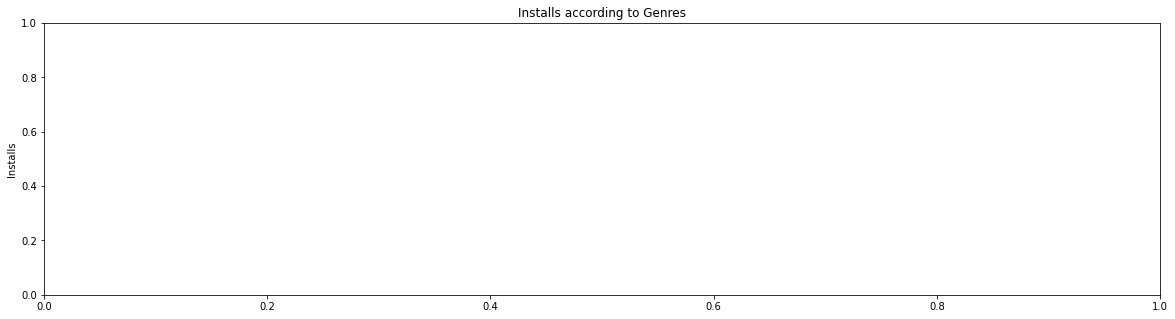

In [40]:
Genre = play_store_data.groupby('Genres')
Types_total_installs = play_store_data.groupby('Genres')[['Installs']].sum().reset_index()
plt.figure(figsize=(20, 5))
plt.ylabel('Installs')
plt.title('Installs according to Genres')
sns.barplot(x='Genre', y='Installs', data = Types_total_installs)